#### Abstract
* A Brain tumor is considered as one of the aggressive diseases, among children and adults. Brain tumors account for 85 to 90 percent of all primary Central Nervous System(CNS) tumors. Every year, around 11,700 people are diagnosed with a brain tumor. The 5-year survival rate for people with a cancerous brain or CNS tumor is approximately 34 percent for men and36 percent for women. Brain Tumors are classified as: Benign Tumor, Malignant Tumor, Pituitary Tumor, etc. Proper treatment, planning, and accurate diagnostics should be implemented to improve the life expectancy of the patients. The best technique to detect brain tumors is Magnetic Resonance Imaging (MRI). A huge amount of image data is generated through the scans. These images are examined by the radiologist. A manual examination can be error-prone due to the level of complexities involved in brain tumors and their properties.
* Application of automated classification techniques using Machine Learning(ML) and Artificial Intelligence(AI)has consistently shown higher accuracy than manual classification. Hence, proposing a system performing detection and classification by using Deep Learning Algorithms using Convolution-Neural Network (CNN), Artificial Neural Network (ANN), and Transfer-Learning (TL) would be helpful to doctors all around the world.

#### Context
* Brain Tumors are complex. There are a lot of abnormalities in the sizes and location of the brain tumor(s). This makes it really difficult for complete understanding of the nature of the tumor. Also, a professional Neurosurgeon is required for MRI analysis. Often times in developing countries the lack of skillful doctors and lack of knowledge about tumors makes it really challenging and time-consuming to generate reports from MRI’. So an automated system on Cloud can solve this problem.

#### Definition
* To Detect and Classify Brain Tumor using, CNN or ANN; as an asset of Deep Learning and to examine the tumor position(segmentation).

#### About the data:
* The dataset contains 3 folders: yes, no and pred which contains 3060 Brain MRI Images.

# PACKAGES AND LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from tensorflow.keras.optimizers import RMSprop,Adam
import glob
from PIL import Image

# IGNORING UNNECESSARRY WARNINGS

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# DATA PROCESS

In [4]:
from zipfile import ZipFile
with ZipFile('archive.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

#### TRAIN

In [13]:
No_Data_Path = Path("no")
Yes_Data_Path = Path("yes")

In [14]:
No_JPG_Path = list(No_Data_Path.glob(r"*.jpg"))
Yes_JPG_Path = list(Yes_Data_Path.glob(r"*.jpg"))

In [15]:
print(No_JPG_Path[0:5])
print("-----"*20)
print(Yes_JPG_Path[0:5])

[PosixPath('no/no231.jpg'), PosixPath('no/no674.jpg'), PosixPath('no/no1032.jpg'), PosixPath('no/no541.jpg'), PosixPath('no/no744.jpg')]
----------------------------------------------------------------------------------------------------
[PosixPath('yes/y762.jpg'), PosixPath('yes/y168.jpg'), PosixPath('yes/y789.jpg'), PosixPath('yes/y489.jpg'), PosixPath('yes/y530.jpg')]


In [16]:
Yes_No_List = []

for No_JPG in No_JPG_Path:
    Yes_No_List.append(No_JPG)
    
for Yes_JPG in Yes_JPG_Path:
    Yes_No_List.append(Yes_JPG)

In [17]:
print(Yes_No_List[0:10])

[PosixPath('no/no231.jpg'), PosixPath('no/no674.jpg'), PosixPath('no/no1032.jpg'), PosixPath('no/no541.jpg'), PosixPath('no/no744.jpg'), PosixPath('no/no27.jpg'), PosixPath('no/no1054.jpg'), PosixPath('no/no1058.jpg'), PosixPath('no/no1187.jpg'), PosixPath('no/no234.jpg')]


In [18]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Yes_No_List))

In [19]:
print(JPG_Labels[0:10])

['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']


In [20]:
print("NO COUNTING: ", JPG_Labels.count("no"))
print("YES COUNTING: ", JPG_Labels.count("yes"))

NO COUNTING:  1500
YES COUNTING:  1500


In [21]:
JPG_Path_Series = pd.Series(Yes_No_List,name="JPG").astype(str)
JPG_Category_Series = pd.Series(JPG_Labels,name="TUMOR_CATEGORY")

In [22]:
Main_Train_Data = pd.concat([JPG_Path_Series,JPG_Category_Series],axis=1)

In [23]:
print(Main_Train_Data.head(-1))

                JPG TUMOR_CATEGORY
0      no/no231.jpg             no
1      no/no674.jpg             no
2     no/no1032.jpg             no
3      no/no541.jpg             no
4      no/no744.jpg             no
...             ...            ...
2994   yes/y177.jpg            yes
2995  yes/y1133.jpg            yes
2996   yes/y653.jpg            yes
2997   yes/y669.jpg            yes
2998    yes/y76.jpg            yes

[2999 rows x 2 columns]


#### TEST

In [33]:
Prediction_Path = Path("pred")

In [34]:
Test_JPG_Path = list(Prediction_Path.glob(r"*.jpg"))

In [35]:
print(Test_JPG_Path[0:5])

[PosixPath('pred/pred53.jpg'), PosixPath('pred/pred54.jpg'), PosixPath('pred/pred49.jpg'), PosixPath('pred/pred59.jpg'), PosixPath('pred/pred37.jpg')]


In [36]:
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))

In [37]:
print(Test_JPG_Labels[0:5])

['pred', 'pred', 'pred', 'pred', 'pred']


In [38]:
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels,name="TUMOR_CATEGORY")

In [39]:
Test_Data = pd.concat([Test_JPG_Path_Series,Test_JPG_Labels_Series],axis=1)

In [40]:
print(Test_Data.head())

               JPG TUMOR_CATEGORY
0  pred/pred53.jpg           pred
1  pred/pred54.jpg           pred
2  pred/pred49.jpg           pred
3  pred/pred59.jpg           pred
4  pred/pred37.jpg           pred


# SHUFFLING

In [41]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

In [42]:
print(Main_Train_Data.head(-1))

                JPG TUMOR_CATEGORY
0      yes/y161.jpg            yes
1      no/no251.jpg             no
2     yes/y1429.jpg            yes
3      yes/y425.jpg            yes
4     no/no1050.jpg             no
...             ...            ...
2994   yes/y285.jpg            yes
2995  yes/y1253.jpg            yes
2996   yes/y788.jpg            yes
2997   yes/y306.jpg            yes
2998  no/no1234.jpg             no

[2999 rows x 2 columns]


# VISUALIZATION

Text(0.5, 1.0, 'yes')

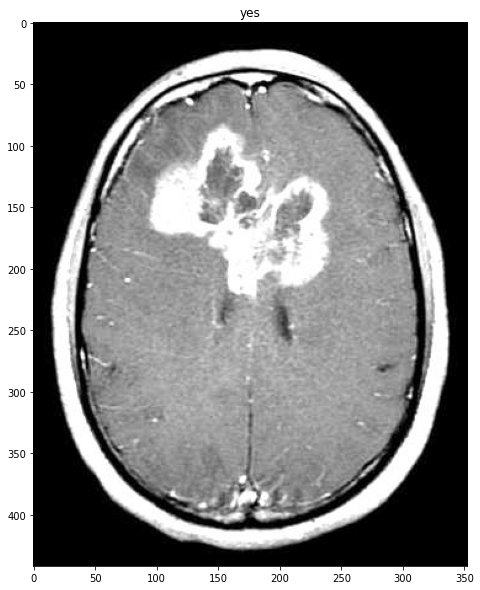

In [43]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][10]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][10])

Text(0.5, 1.0, 'yes')

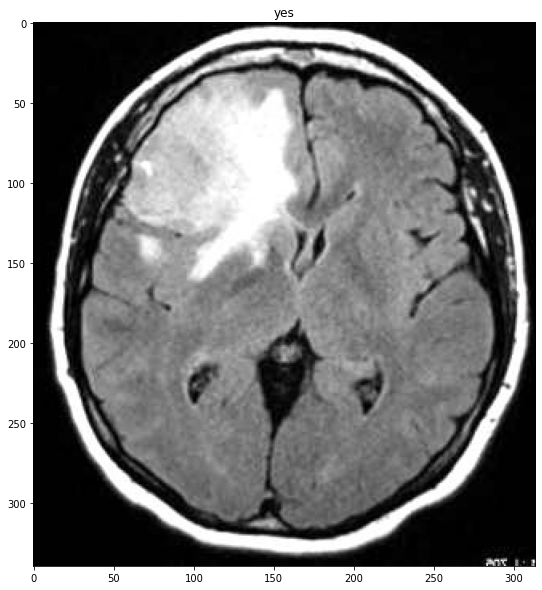

In [44]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][2997]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][2997])

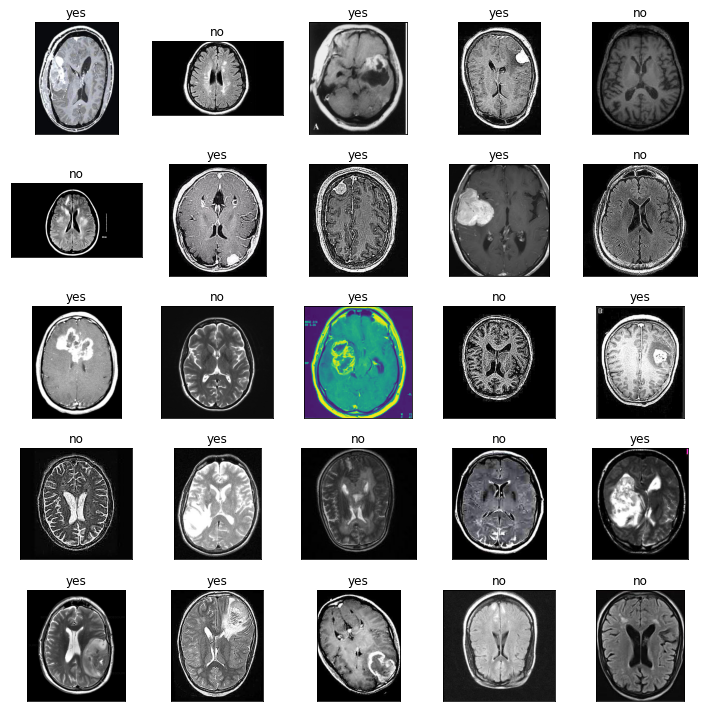

In [45]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Train_Data["JPG"][i]))
    ax.set_title(Main_Train_Data["TUMOR_CATEGORY"][i])
plt.tight_layout()
plt.show()

# MODEL TRAINING DATA

In [46]:
train_data,test_data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42)

In [47]:
print(train_data.shape)

(2700, 2)


In [48]:
print(train_data.head())

                JPG TUMOR_CATEGORY
433   yes/y1071.jpg            yes
1151   no/no514.jpg             no
73    no/no1305.jpg             no
1536  yes/y1175.jpg            yes
2709    no/no73.jpg             no


In [49]:
print(test_data.shape)

(300, 2)


In [50]:
print(test_data.head())

                JPG TUMOR_CATEGORY
1801  no/no1042.jpg             no
1190   yes/y709.jpg            yes
1817  no/no1025.jpg             no
251    no/no958.jpg             no
2505   yes/y692.jpg            yes


# IMAGE DATA GENERATOR WITHOUT DIVERSIFICATION

#### BASED ON TRAIN DATA

In [51]:
Generator_Basic = ImageDataGenerator(rescale=1./255,
                                     validation_split=0.1)

In [52]:
Train_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Found 2430 validated image filenames belonging to 2 classes.


In [53]:
Validation_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 270 validated image filenames belonging to 2 classes.


In [54]:
Test_Set = Generator_Basic.flow_from_dataframe(dataframe=test_data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              color_mode="grayscale",
                                              class_mode="categorical",
                                              batch_size=20,
                                              target_size=(200,200))

Found 300 validated image filenames belonging to 2 classes.


#### CHECKING

In [55]:
for data_batch,label_batch in Train_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [56]:
for data_batch,label_batch in Validation_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [57]:
for data_batch,label_batch in Test_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [58]:
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 1, 0, 0, 1]
(200, 200, 1)


In [59]:
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 0, 0, 1, 0]
(200, 200, 1)


In [60]:
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

{'no': 0, 'yes': 1}
[0, 1, 0, 0, 1]
(200, 200, 1)


# CNN MODEL FOR NON-DIVERSIFICATION

#### MODEL STRUCTURE

In [61]:
Model = Sequential()

Model.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(64,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(128,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(256,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Flatten())
Model.add(Dropout(0.5))
Model.add(Dense(512,activation="relu"))
Model.add(Dense(2,activation="softmax"))

#### MODEL COMPILE

In [62]:
Model.compile(optimizer=RMSprop(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

#### MODEL FITTING

In [63]:
ANN_Model = Model.fit(Train_Set, validation_data=Validation_Set, epochs=30, steps_per_epoch=120)

Epoch 1/30
120/120 [==============================] - 29s 130ms/step - loss: 0.7052 - accuracy: 0.7238 - val_loss: 0.4168 - val_accuracy: 0.8185
Epoch 2/30
120/120 [==============================] - 13s 109ms/step - loss: 0.4107 - accuracy: 0.8255 - val_loss: 0.4003 - val_accuracy: 0.8444
Epoch 3/30
120/120 [==============================] - 14s 117ms/step - loss: 0.3039 - accuracy: 0.8736 - val_loss: 0.2713 - val_accuracy: 0.9111
Epoch 4/30
120/120 [==============================] - 17s 141ms/step - loss: 0.2554 - accuracy: 0.9067 - val_loss: 0.3123 - val_accuracy: 0.8630
Epoch 5/30
120/120 [==============================] - 14s 118ms/step - loss: 0.2111 - accuracy: 0.9213 - val_loss: 0.3141 - val_accuracy: 0.8889
Epoch 6/30
120/120 [==============================] - 12s 99ms/step - loss: 0.1757 - accuracy: 0.9360 - val_loss: 0.1551 - val_accuracy: 0.9296
Epoch 7/30
120/120 [==============================] - 12s 100ms/step - loss: 0.1577 - accuracy: 0.9481 - val_loss: 0.1604 - val_acc

#### MODEL SUMMARY

In [64]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 98, 98, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 64)        0

#### CHECKING MODEL WITH GRAPHIC

In [65]:
HistoryDict = ANN_Model.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

No handles with labels found to put in legend.


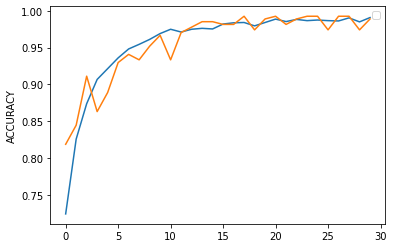

In [66]:
plt.plot(ANN_Model.history["accuracy"])
plt.plot(ANN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

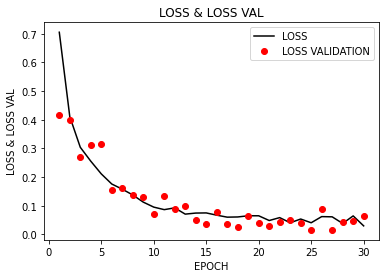

In [67]:
plt.plot(epochs,losses,"k-",label="LOSS")
plt.plot(epochs,val_losses,"ro",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

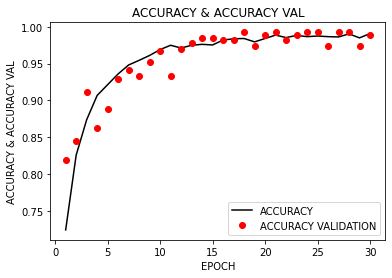

In [68]:
plt.plot(epochs,acc,"k-",label="ACCURACY")
plt.plot(epochs,val_acc,"ro",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

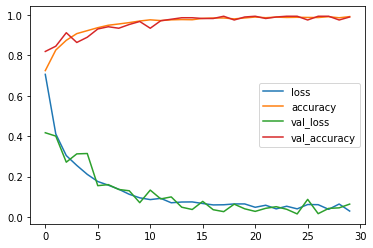

In [69]:
Dict_Summary = pd.DataFrame(ANN_Model.history)
Dict_Summary.plot()

#### PREDICTION SCORE ON DIVIDED DATA

In [70]:
Model_Results = Model.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.1783
ACCURACY:  0.96


#### PREDICTION PROCESS

In [71]:
Main_Data_Prediction = pd.DataFrame({"JPG":Test_JPG_Path_Series})

In [72]:
print(Main_Data_Prediction.head())

               JPG
0  pred/pred53.jpg
1  pred/pred54.jpg
2  pred/pred49.jpg
3  pred/pred59.jpg
4  pred/pred37.jpg


In [73]:
Main_Test_Generator = ImageDataGenerator(rescale=1./255)

In [74]:
Main_Test_Set = Main_Test_Generator.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))

Found 60 validated image filenames.


In [75]:
Model_Test_Prediction = Model.predict(Main_Test_Set)

In [76]:
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)

In [77]:
print(Model_Test_Prediction)

[1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1
 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0]


In [78]:
Last_Prediction = []
[Last_Prediction.append('NO') if i == 1 else Last_Prediction.append('TUMOR') for i in Model_Test_Prediction]
print(Last_Prediction)

['NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR']


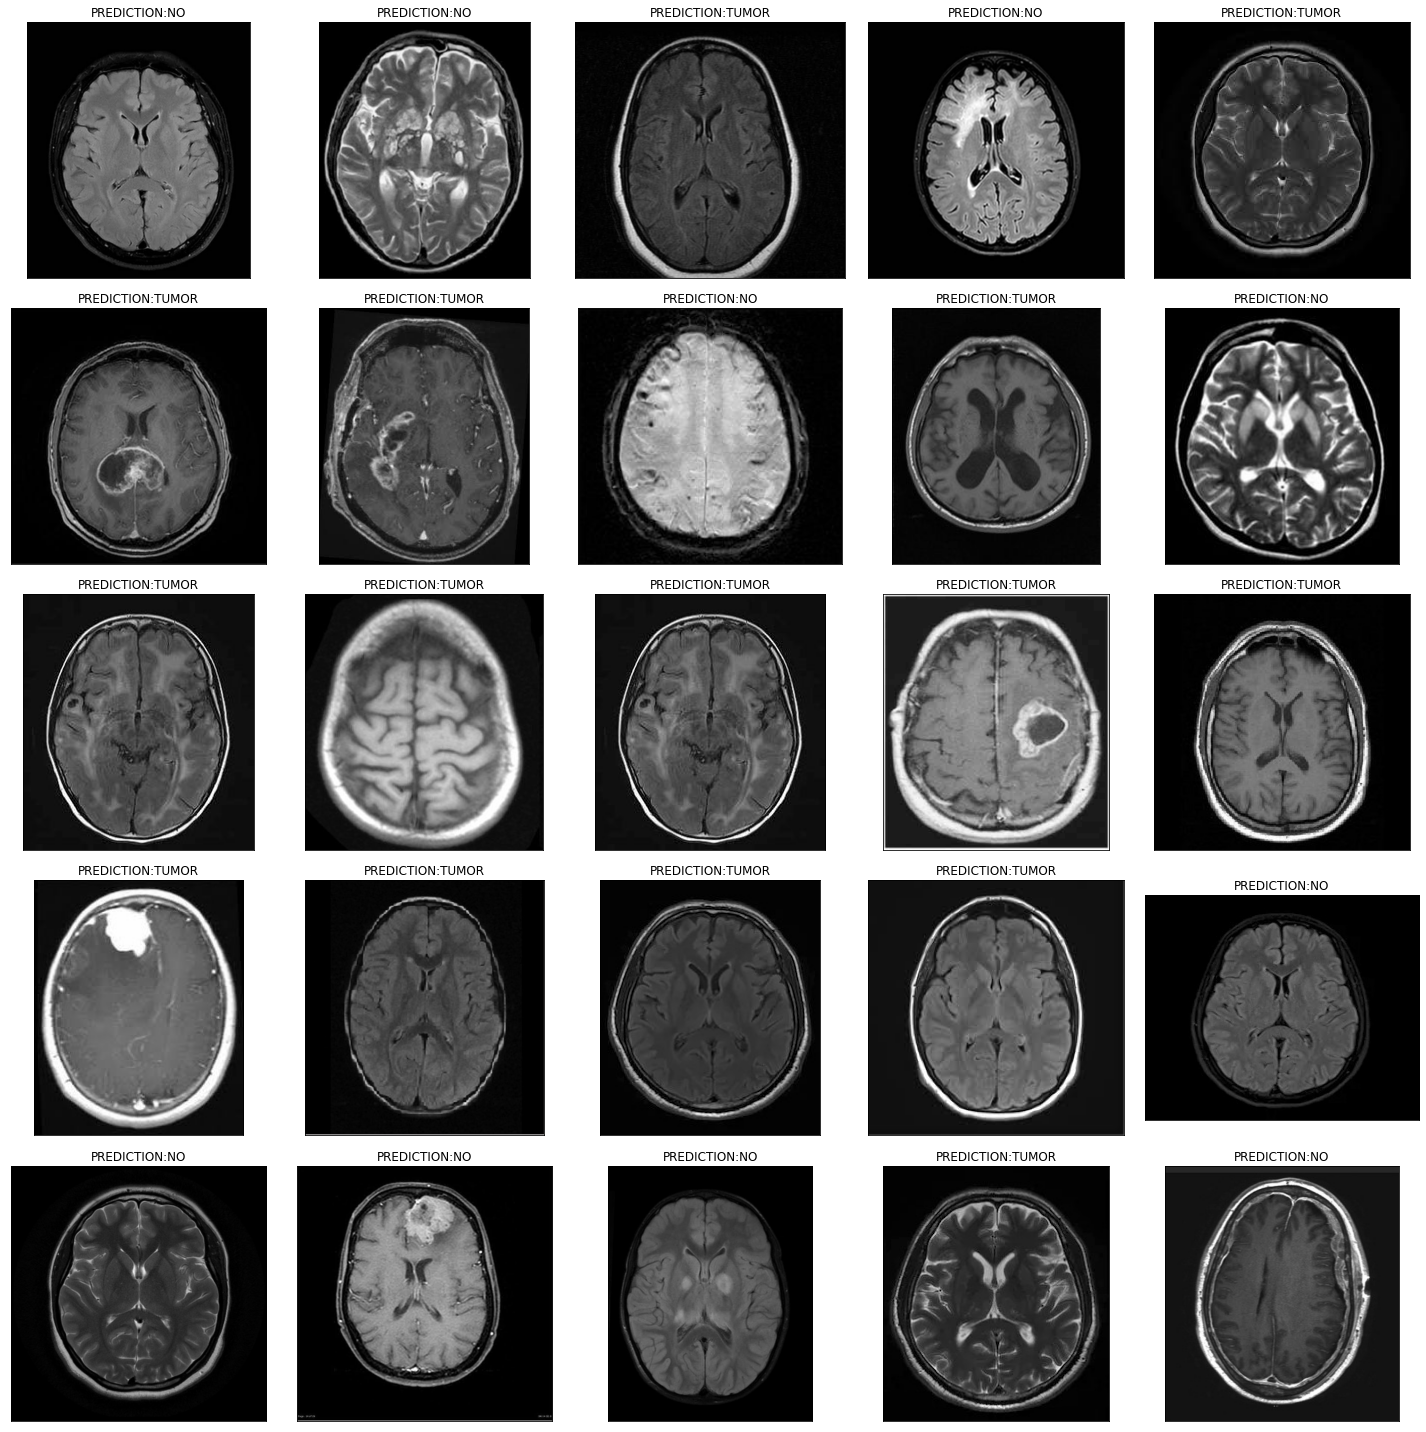

In [79]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction[i]}")
plt.tight_layout()
plt.show()

# IMAGE DATA GENERATOR WITH DIVERSIFICATION

In [80]:
Data_Generator_Div = ImageDataGenerator(rescale=1./255,brightness_range=[0.3,0.9],
                                       rotation_range=30,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode="nearest",
                                       validation_split=0.1)

In [81]:
Train_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Found 2430 validated image filenames belonging to 2 classes.


In [82]:
Validation_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 270 validated image filenames belonging to 2 classes.


In [83]:
Test_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))

Found 60 validated image filenames.


# CNN MODEL WITH DIVERSIFICATION

#### MODEL STRUCTURE

In [84]:
Model_Two = Sequential()

Model_Two.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(64,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(128,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(128,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(256,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Flatten())
Model_Two.add(Dropout(0.5))
Model_Two.add(Dense(512,activation="relu"))
Model_Two.add(Dense(2,activation="softmax"))

#### MODEL COMPILE

In [85]:
Model_Two.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

#### MODEL FITTING

In [86]:
ANN_Model_Two = Model_Two.fit(Train_Set_Div,
                              validation_data = Validation_Set_Div,
                              batch_size=20,
                              epochs=50)

Epoch 1/50
122/122 [==============================] - 23s 176ms/step - loss: 0.7083 - accuracy: 0.5658 - val_loss: 0.6451 - val_accuracy: 0.6519
Epoch 2/50
122/122 [==============================] - 22s 181ms/step - loss: 0.6454 - accuracy: 0.6490 - val_loss: 0.6214 - val_accuracy: 0.6481
Epoch 3/50
122/122 [==============================] - 24s 199ms/step - loss: 0.6293 - accuracy: 0.6778 - val_loss: 0.5287 - val_accuracy: 0.7370
Epoch 4/50
122/122 [==============================] - 21s 173ms/step - loss: 0.5786 - accuracy: 0.7165 - val_loss: 0.5515 - val_accuracy: 0.7222
Epoch 5/50
122/122 [==============================] - 21s 170ms/step - loss: 0.5464 - accuracy: 0.7379 - val_loss: 0.5374 - val_accuracy: 0.7407
Epoch 6/50
122/122 [==============================] - 21s 170ms/step - loss: 0.5334 - accuracy: 0.7609 - val_loss: 0.5200 - val_accuracy: 0.7333
Epoch 7/50
122/122 [==============================] - 21s 171ms/step - loss: 0.4953 - accuracy: 0.7757 - val_loss: 0.5591 - val_ac

#### MODEL SUMMARY

In [87]:
print(Model_Two.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 196, 196, 32)      832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 98, 98, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 128)     

#### CHECKING MODEL WITH GRAPHIC

In [88]:
HistoryDict_Two = ANN_Model_Two.history

val_losses_Two = HistoryDict_Two["val_loss"]
val_acc_Two = HistoryDict_Two["val_accuracy"]
acc_Two = HistoryDict_Two["accuracy"]
losses_Two = HistoryDict_Two["loss"]
epochs_Two = range(1,len(val_losses_Two)+1)

No handles with labels found to put in legend.


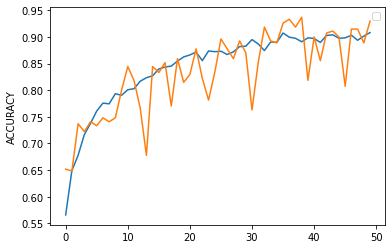

In [89]:
plt.plot(ANN_Model_Two.history["accuracy"])
plt.plot(ANN_Model_Two.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

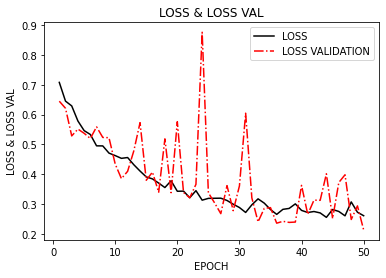

In [90]:
plt.plot(epochs_Two,losses_Two,"k-",label="LOSS")
plt.plot(epochs_Two,val_losses_Two,"r-.",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

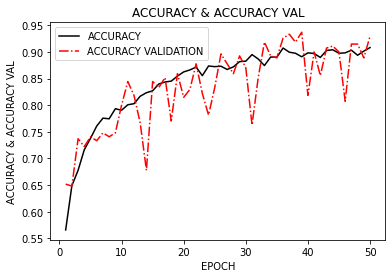

In [91]:
plt.plot(epochs_Two,acc_Two,"k-",label="ACCURACY")
plt.plot(epochs_Two,val_acc_Two,"r-.",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

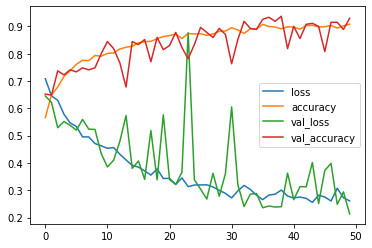

In [92]:
Dict_Summary_Two = pd.DataFrame(ANN_Model_Two.history)
Dict_Summary_Two.plot()

#### PREDICTION SCORE ON DIVIDED DATA

In [93]:
Model_Results_Two = Model_Two.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results_Two[0])
print("ACCURACY:  " + "%.2f" % Model_Results_Two[1])

LOSS:  0.3461
ACCURACY:  0.92


#### PREDICTION PROCESS

In [94]:
Model_Test_Prediction_Two = Model_Two.predict(Test_Set_Div)

In [95]:
Model_Test_Prediction_Two = Model_Test_Prediction_Two.argmax(axis=-1)

In [96]:
print(Model_Test_Prediction_Two)

[0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0
 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0]


In [97]:
Last_Prediction_Two = []
[Last_Prediction_Two.append('NO') if i == 1 else Last_Prediction_Two.append('TUMOR') for i in Model_Test_Prediction_Two]
print(Last_Prediction_Two)

['TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR']


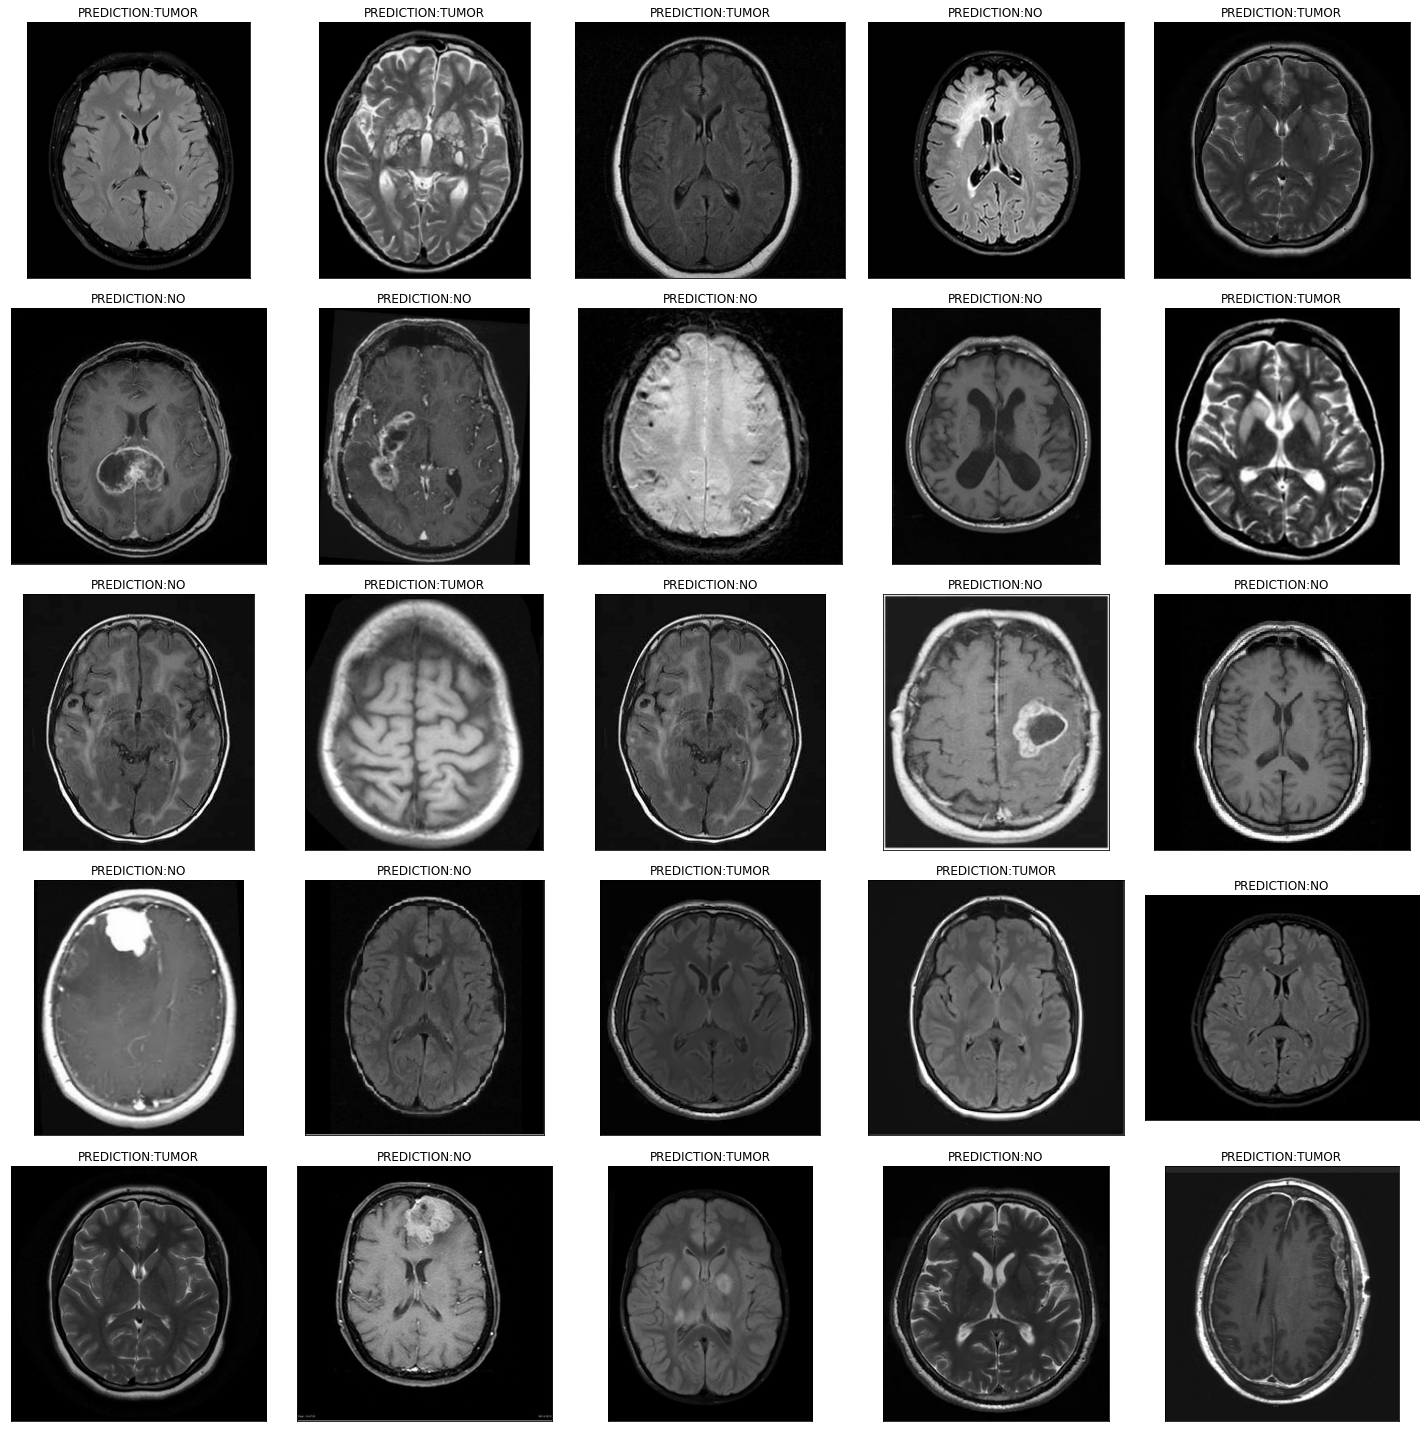

In [98]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction_Two[i]}")
plt.tight_layout()
plt.show()